<a href="https://www.kaggle.com/code/janadarwish/messy-checkerboard?scriptVersionId=262378448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


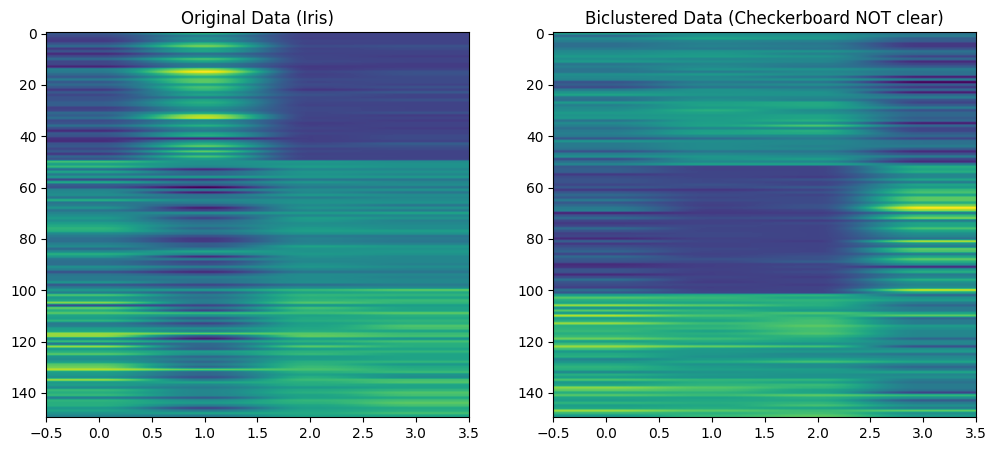

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralBiclustering

# 1️⃣ Load the Iris dataset
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")  # adjust path if needed
X = df.iloc[:, 1:5].values  # numeric columns

# 2️⃣ Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Apply Spectral Biclustering
# Iris is NOT naturally checkerboard-like, so results won't be clean
bicluster = SpectralBiclustering(n_clusters=(3, 2), method='log', random_state=42)
bicluster.fit(X_scaled)

# 4️⃣ Reorder rows and columns according to bicluster labels
fit_data = X_scaled[np.argsort(bicluster.row_labels_)]
fit_data = fit_data[:, np.argsort(bicluster.column_labels_)]

# 5️⃣ Plot original vs biclustered (messy checkerboard)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(X_scaled, aspect='auto', cmap='viridis')
plt.title("Original Data (Iris)")

plt.subplot(1, 2, 2)
plt.imshow(fit_data, aspect='auto', cmap='viridis')
plt.title("Biclustered Data (Checkerboard NOT clear)")

plt.show()
